In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models



In [2]:
len(tf.config.list_physical_devices("GPU"))>0

True

In [3]:
#batch_size
bs=32
#image size
img_size=128

train_ratio=0.7
validation_ratio=0.15
test_ratio=0.15

In [4]:
full_dataset = image_dataset_from_directory(
    'Merged_cats_dogs',
    seed = 42,
    batch_size = bs,
    image_size = [img_size,img_size]
)

Found 25000 files belonging to 2 classes.


In [5]:
dataset_size = len(full_dataset)
train_size = int(train_ratio * dataset_size)
validation_size = int(validation_ratio * dataset_size)
test_size = int(test_ratio * dataset_size)

In [6]:
train_ds = full_dataset.take(train_size)
remaining_ds = full_dataset.skip(train_size)
validation_ds = remaining_ds.take(validation_size)
test_ds = remaining_ds.skip(validation_size)

In [7]:
full_dataset.class_names

['cats', 'dogs']

[[[153.86462   65.864624 126.864624]
  [147.40637   59.406372 120.40637 ]
  [148.88281   60.882812 121.88281 ]
  ...
  [ 90.57947   91.141846  88.865845]
  [114.83557  106.94177  107.56836 ]
  [131.43384  126.43384  122.95935 ]]

 [[153.51233   63.629517 127.62952 ]
  [164.33081   74.448    138.448   ]
  [148.05481   58.171997 122.172   ]
  ...
  [111.83508  103.30408  109.803955]
  [135.61572  119.48462  128.09705 ]
  [113.07202  111.797    112.1095  ]]

 [[158.65125   67.651245 134.65125 ]
  [150.5083    59.5083   126.5083  ]
  [151.41406   60.414062 127.41406 ]
  ...
  [131.5232   132.84412  136.82568 ]
  [105.936646  98.55371  105.58496 ]
  [129.20581  132.88538  135.81519 ]]

 ...

 [[ 74.739746  65.739746  68.739746]
  [ 89.45325   79.45325   80.45325 ]
  [ 97.37378   84.84253   84.628784]
  ...
  [ 94.97656   84.71094   82.71094 ]
  [126.48657  121.48657  117.09595 ]
  [ 91.52893   83.32837   77.46643 ]]

 [[104.32178   98.32178   98.32178 ]
  [100.839355  93.76123   94.120605]


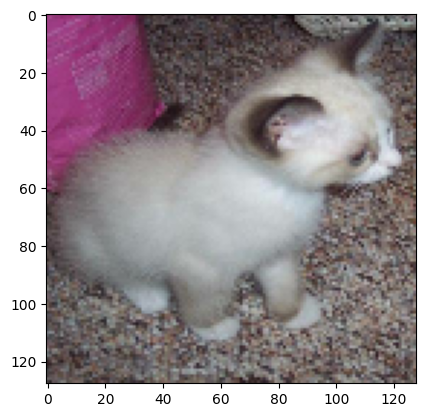

In [8]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].numpy())

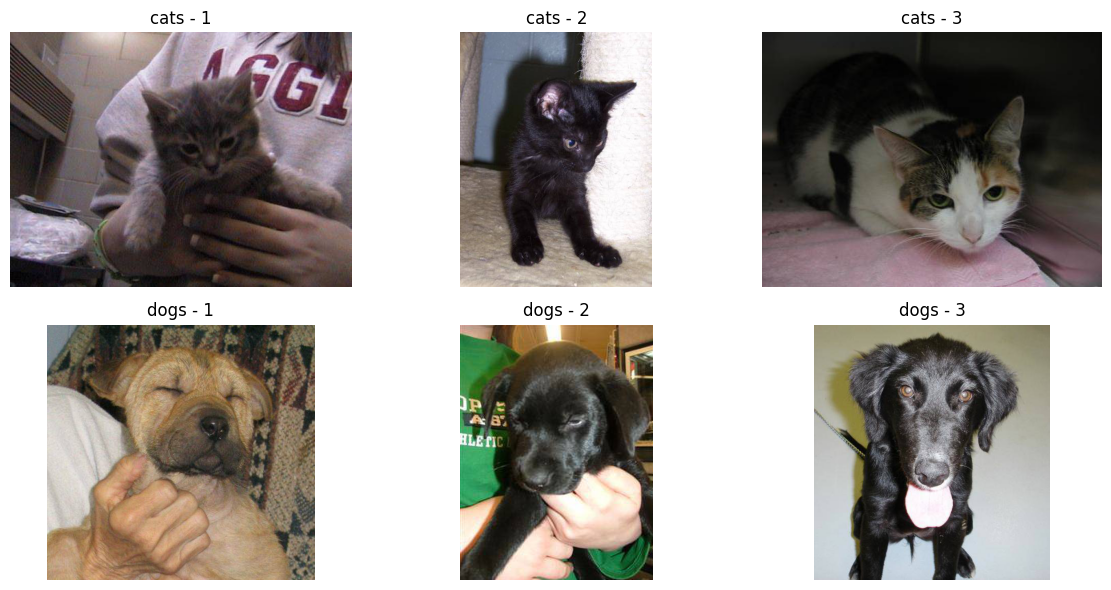

In [41]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing the images
directory = "Merged_cats_dogs"

# Define the subdirectories (categories)
categories = ["cats", "dogs"]

# Number of sample images to print per category
num_samples = 3

# Create a plot to display images
fig, axes = plt.subplots(len(categories), num_samples, figsize=(12, 6))

# Loop through each category
for i, category in enumerate(categories):
    category_dir = os.path.join(directory, category)
    # Get list of image files in the category directory
    image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
    # Randomly select sample images
    sample_images = random.sample(image_files, num_samples)
    # Display the sample images
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_file)
        img = mpimg.imread(image_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"{category} - {j+1}")

plt.tight_layout()
plt.show()


In [16]:
model = Sequential([
    layers.Conv2D(64,(3,3),input_shape = (128,128,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3),padding = 'same', activation = 'relu'),
    # layers.Dropout(0.2),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.2),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),padding = 'same', activation = 'relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 2, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                  

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_history=model.fit(train_ds, validation_data=validation_ds, epochs = 10)

Epoch 1/10


547/547 [==============================] - 51s 88ms/step - loss: 3.6250 - accuracy: 0.5185 - val_loss: 0.6923 - val_accuracy: 0.4963
Epoch 2/10
547/547 [==============================] - 47s 87ms/step - loss: 0.6874 - accuracy: 0.5458 - val_loss: 0.6867 - val_accuracy: 0.5545
Epoch 3/10
547/547 [==============================] - 47s 87ms/step - loss: 0.6685 - accuracy: 0.5786 - val_loss: 0.6956 - val_accuracy: 0.5660
Epoch 4/10
547/547 [==============================] - 47s 86ms/step - loss: 0.6342 - accuracy: 0.6178 - val_loss: 0.7192 - val_accuracy: 0.5577
Epoch 5/10
547/547 [==============================] - 47s 86ms/step - loss: 0.5876 - accuracy: 0.6580 - val_loss: 0.7388 - val_accuracy: 0.5596
Epoch 6/10
547/547 [==============================] - 47s 86ms/step - loss: 0.5649 - accuracy: 0.6752 - val_loss: 0.8199 - val_accuracy: 0.5825
Epoch 7/10
547/547 [==============================] - 47s 86ms/step - loss: 0.5026 - accuracy: 0.7205 - val_loss: 0.9147 - val_accuracy: 0.5743
Epo

In [20]:
model.evaluate(test_ds)

118/118 [==============================] - 8s 21ms/step - loss: 1.1843 - accuracy: 0.5645


[1.1843371391296387, 0.5644989609718323]

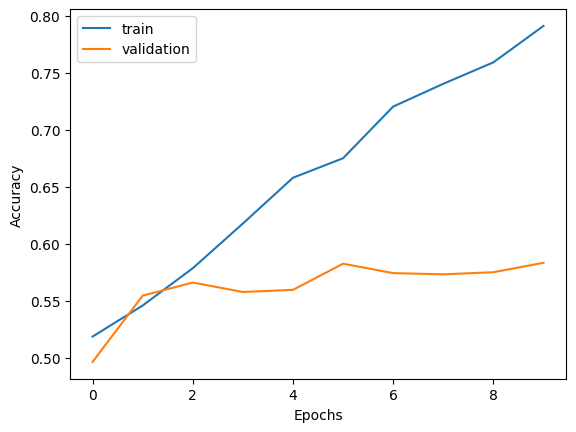

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

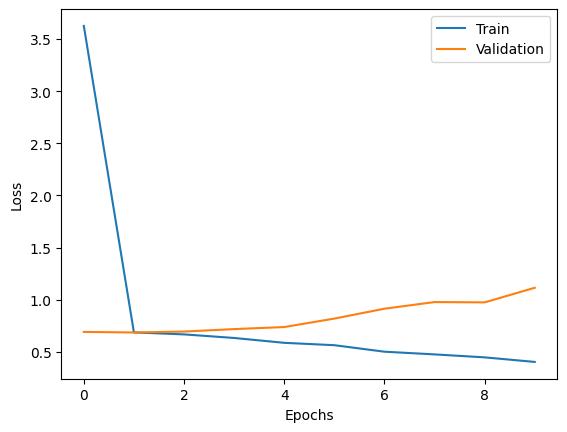

In [22]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

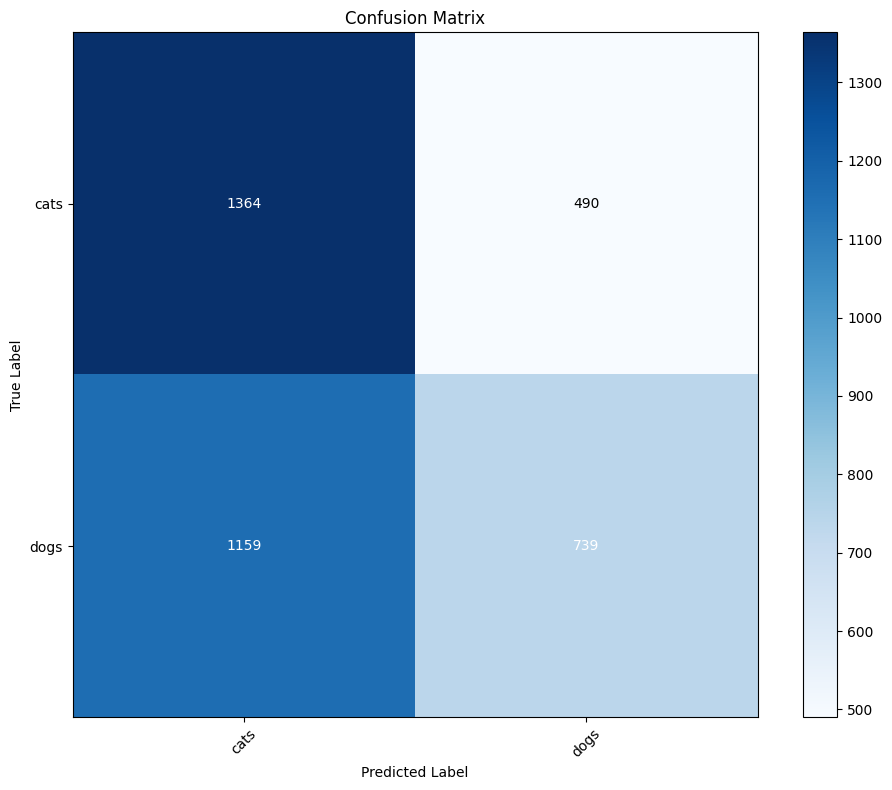

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=full_dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [49]:
import tensorflow as tf

# Assuming you have defined test_ds and model

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    predicted_classes = tf.argmax(predictions, axis=1)
    
    # Convert TensorFlow tensors to numpy arrays for easier handling
    true_labels.extend(labels.numpy())
    predicted_labels.extend(predicted_classes.numpy())

# Print some sample predictions along with their true labels
num_samples_to_inspect = 10  # Specify the number of samples to inspect

print("Sample predictions:")
for i in range(num_samples_to_inspect):
    print("Sample", i+1)
    print("True label:", true_labels[i])
    print("Predicted label:", predicted_labels[i])
    print()  # Add a blank line for better readability


Sample predictions:
Sample 1
True label: 0
Predicted label: 0

Sample 2
True label: 0
Predicted label: 0

Sample 3
True label: 1
Predicted label: 0

Sample 4
True label: 1
Predicted label: 0

Sample 5
True label: 0
Predicted label: 0

Sample 6
True label: 0
Predicted label: 0

Sample 7
True label: 0
Predicted label: 0

Sample 8
True label: 0
Predicted label: 0

Sample 9
True label: 0
Predicted label: 0

Sample 10
True label: 0
Predicted label: 0



In [50]:
class_names=full_dataset.class_names
class_names

['cats', 'dogs']

In [9]:
from tensorflow.keras.applications import VGG16

num_classes=len(full_dataset.class_names)

def pretrainedModel():
    base_model=VGG16(include_top=False,weights='imagenet',input_shape=(img_size,img_size,3))
    
    base_model.trainable=False
    
    model=models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes,activation='softmax')
    ])
    
    return model

model=pretrainedModel()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10)

Epoch 1/10
547/547 [==============================] - 59s 88ms/step - loss: 0.5809 - accuracy: 0.8992 - val_loss: 0.1620 - val_accuracy: 0.9383
Epoch 2/10
547/547 [==============================] - 47s 86ms/step - loss: 0.1722 - accuracy: 0.9302 - val_loss: 0.1620 - val_accuracy: 0.9367
Epoch 3/10
547/547 [==============================] - 47s 85ms/step - loss: 0.1409 - accuracy: 0.9440 - val_loss: 0.1539 - val_accuracy: 0.9378
Epoch 4/10
547/547 [==============================] - 47s 85ms/step - loss: 0.1347 - accuracy: 0.9479 - val_loss: 0.1398 - val_accuracy: 0.9447
Epoch 5/10
547/547 [==============================] - 47s 87ms/step - loss: 0.1252 - accuracy: 0.9513 - val_loss: 0.1472 - val_accuracy: 0.9415
Epoch 6/10
547/547 [==============================] - 47s 86ms/step - loss: 0.1129 - accuracy: 0.9571 - val_loss: 0.1431 - val_accuracy: 0.9431
Epoch 7/10
547/547 [==============================] - 48s 87ms/step - loss: 0.1095 - accuracy: 0.9570 - val_loss: 0.1534 - val_accuracy:

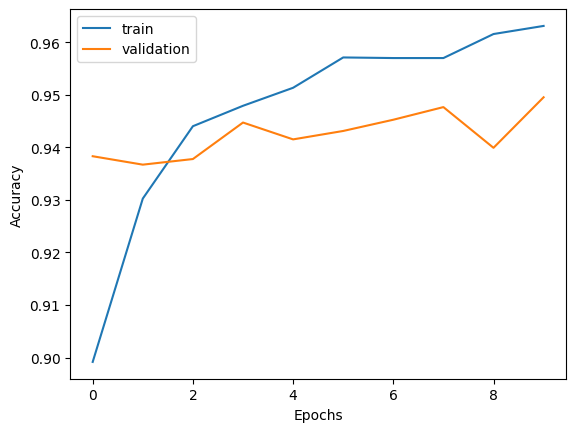

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

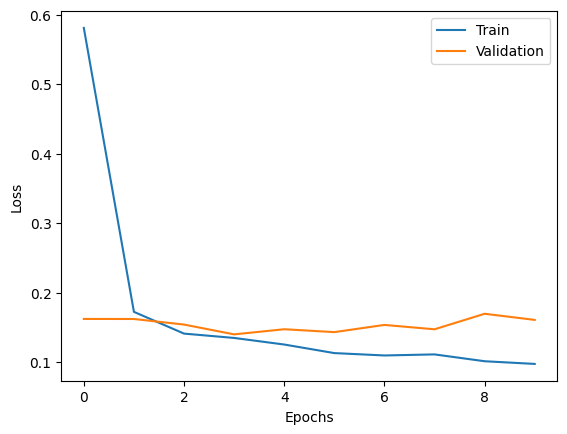

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

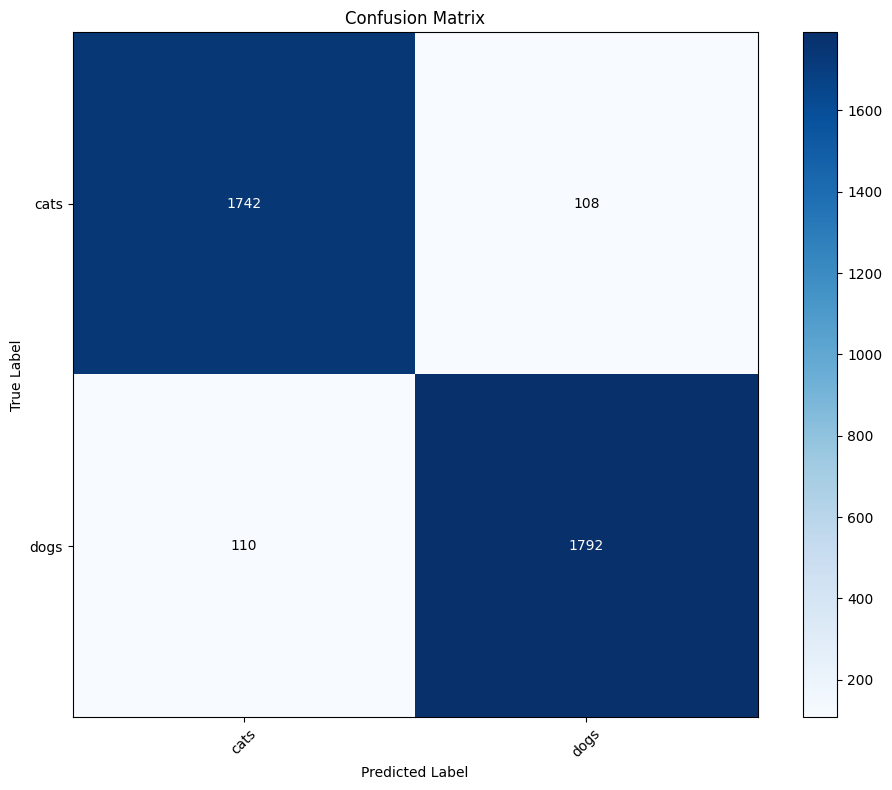

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(2))
class_names=full_dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()